### Load Data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('../Dataset/games.csv')

# Convert Release Data to the timestamp
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df = df[df['Release Date'].dt.year > 1990]
df = df[df['Release Date'].dt.year <= 2023]


# Convert Rating and Plays to integer
def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)
    
df['Plays'] = df['Plays'].apply(convert_to_int)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')



df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1481 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1481 non-null   int64         
 1   Title              1481 non-null   object        
 2   Release Date       1481 non-null   datetime64[ns]
 3   Team               1480 non-null   object        
 4   Rating             1471 non-null   float64       
 5   Times Listed       1481 non-null   object        
 6   Number of Reviews  1481 non-null   object        
 7   Genres             1481 non-null   object        
 8   Summary            1481 non-null   object        
 9   Reviews            1481 non-null   object        
 10  Plays              1481 non-null   int64         
 11  Playing            1481 non-null   object        
 12  Backlogs           1481 non-null   object        
 13  Wishlist           1481 non-null   object        
dtypes: datetime64

### Matplotlib: Plot Total Plays and Average Rating by Year

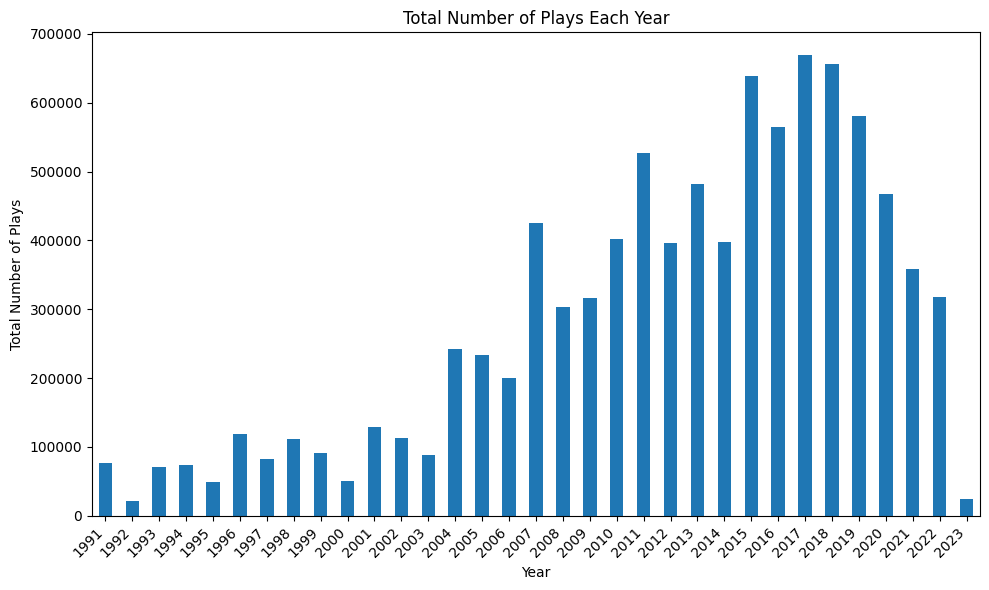

In [33]:
total_plays_per_year = df.groupby(df['Release Date'].dt.year)['Plays'].sum()

plt.figure(figsize=(10, 6))
total_plays_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Number of Plays')
plt.title('Total Number of Plays Each Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

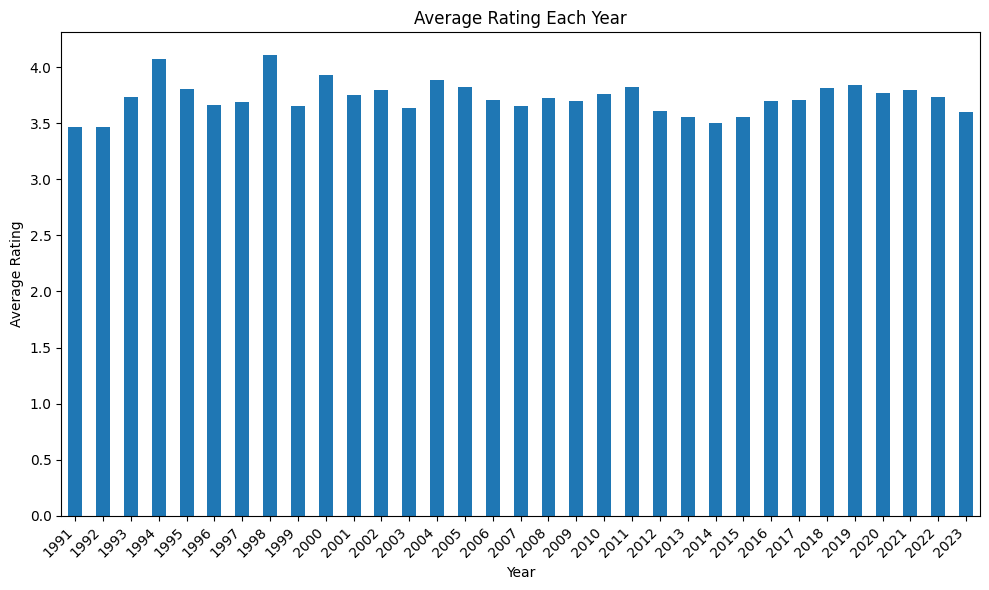

In [34]:
avg_rating_per_year = df.groupby(df['Release Date'].dt.year)['Rating'].mean()

plt.figure(figsize=(10, 6))
avg_rating_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Each Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Update Dataset: 
#### Explode Genres Column

In [35]:
from ast import literal_eval
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('../Dataset/games.csv')

# Convert Release Data to the timestamp
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df = df[df['Release Date'].dt.year > 1990]
df = df[df['Release Date'].dt.year <= 2023]


# Convert Rating and Plays to integer
def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)
    
df['Plays'] = df['Plays'].apply(convert_to_int)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df['Genres'] = df['Genres'].apply(literal_eval)
df_exploded = df.explode('Genres').dropna(subset=['Genres']) # create row for each genre in row's list of genres
genres_dummies = pd.get_dummies(df_exploded['Genres']) # one hot encoding thing...
genres_aggregated = genres_dummies.groupby(genres_dummies.index).sum() # recombine rows that were exploded
df = pd.concat([df, genres_aggregated], axis=1)
df.drop('Genres', axis=1, inplace=True)

df.info()
# df.to_csv('games_genres_expanded.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1481 entries, 0 to 1511
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1481 non-null   int64         
 1   Title                1481 non-null   object        
 2   Release Date         1481 non-null   datetime64[ns]
 3   Team                 1480 non-null   object        
 4   Rating               1471 non-null   float64       
 5   Times Listed         1481 non-null   object        
 6   Number of Reviews    1481 non-null   object        
 7   Summary              1481 non-null   object        
 8   Reviews              1481 non-null   object        
 9   Plays                1481 non-null   int64         
 10  Playing              1481 non-null   object        
 11  Backlogs             1481 non-null   object        
 12  Wishlist             1481 non-null   object        
 13  Adventure            1478 non-null   f

### Visualize Exploded Genres

In [36]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from ast import literal_eval
import plotly.offline as offline



df = pd.read_csv('../Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].apply(literal_eval)


def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

# Apply the custom function to the 'Value' column
df['Plays'] = df['Plays'].apply(convert_to_int)

df = df.explode('Genres').dropna(subset=['Genres'])


df['Year'] = df['Release Date'].apply(lambda x: x.strftime('%Y'))
avg_rating_per_date_genre = df.groupby(['Year', 'Genres'])['Plays'].sum().unstack().reset_index()


fig = px.bar(avg_rating_per_date_genre, x='Year', y=avg_rating_per_date_genre.columns[1:],
             title='Total Plays by Genre Over Time',
             labels={'Release Date': 'Release Date', 'value': 'Total Plays', 'variable': 'Genre'},
             barmode='stack'
            )

fig.update_layout(xaxis_tickangle=-45)
fig.show()

offline.plot(fig, filename="plays_by_genre.html", auto_open=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



'plays_by_genre.html'

### Visualize Exploded Teams

In [37]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from ast import literal_eval


df = pd.read_csv('../Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

df = df.dropna(subset=['Team'])
df['Team'] = df['Team'].apply(literal_eval)

df = df.explode('Team').dropna(subset=['Team'])  # Drop rows with NaN in 'Genres' column


def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)


df['Year'] = df['Release Date'].apply(lambda x: x.strftime('%Y'))
avg_rating_per_date_genre = df.groupby(['Year', 'Team'])['Plays'].sum().unstack().reset_index()


fig = px.bar(avg_rating_per_date_genre, x='Year', y=avg_rating_per_date_genre.columns[1:],
             title='Total Plays by Teams Over Time',
             labels={'Release Date': 'Release Date', 'value': 'Total Teams', 'variable': 'Team'},
             barmode='stack'
            )

fig.update_layout(xaxis_tickangle=-45)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Matplotlib: Comparing Total Plays with Total Releases

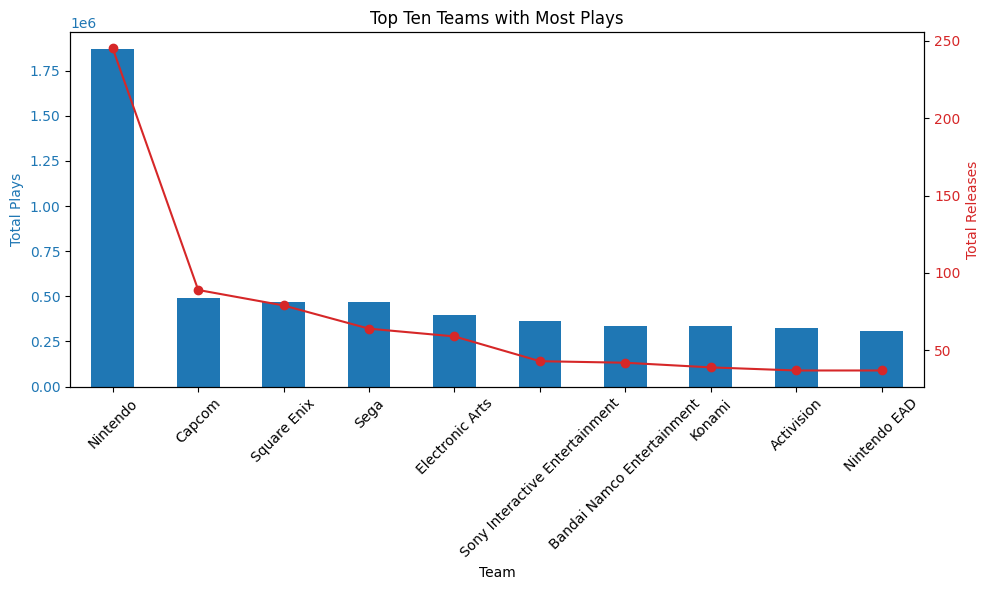

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,Bandai Namco Entertainment,4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3.8K,4.6K,4.8K
0,0,Elden Ring,2022-02-25,FromSoftware,4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,Supergiant Games,4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2.5K,5K,2.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo EPD Production Group No. 3,4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2.5K,5K,2.6K


In [38]:
from ast import literal_eval
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('../Dataset/games.csv')

# Remove rows with 'Release Date' as 'releases on TBD'
df = df[df['Release Date'] != 'releases on TBD']

# Convert 'Release Date' to datetime format
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

# Explode the 'Team' column
df = df.dropna(subset=['Team'])
df['Team'] = df['Team'].apply(literal_eval)
df = df.explode('Team').dropna(subset=['Team'])

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

# Apply the custom function to the 'Value' column
df['Plays'] = df['Plays'].apply(convert_to_int)

# Calculate the total plays per team
total_plays_per_team = df.groupby('Team')['Plays'].count().nlargest(10)

# Calculate the average plays per team
avg_plays_per_team = df.groupby('Team')['Plays'].sum().nlargest(10)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average plays per team
color = 'tab:blue'
ax1.set_xlabel('Team')
ax1.set_ylabel('Total Plays', color=color)
avg_plays_per_team.plot(kind='bar', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for total plays per team
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Releases', color=color)
total_plays_per_team.plot(kind='line', marker='o', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and formatting
plt.title('Top Ten Teams with Most Plays')
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=45 )
plt.tight_layout()
plt.show()

# Save the updated DataFrame to a CSV file
df.to_csv('game_teams_exploded.csv', index=False)

df.head()


### Plotly: Comparing Total Plays with Total Releases

In [39]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv('../Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].dt.year

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

# Explode the 'Team' column
df = df.dropna(subset=['Team'])
df['Team'] = df['Team'].apply(literal_eval)
df = df.explode('Team').dropna(subset=['Team'])

# Group by 'Year' and calculate the average rating and total plays
avg_rating = df.groupby('Team')['Rating'].mean()
total_plays = df.groupby('Team')['Plays'].sum()

# Create a figure with two y-axes
fig = go.Figure()

# Add scatter plot for average rating on the left y-axis
fig.add_trace(go.Scatter(x=avg_rating.index, y=avg_rating.values, mode='lines', name='Average Rating', line=dict(color='blue')))

# Add scatter plot for total plays on the right y-axis
fig.add_trace(go.Scatter(x=total_plays.index, y=total_plays.values, mode='lines', name='Total Plays', line=dict(color='red'), yaxis='y2'))

# Update layout with x-axis title and range slider
fig.update_layout(
    xaxis_title='Team',
    title='Average Rating and Total Plays by Team',
    xaxis=dict(
        rangeslider=dict(
            visible=True,
        ),
        type='category'  # Set x-axis type to category for discrete years
    ),
    yaxis=dict(
        title='Average Rating'
    ),
    yaxis2=dict(
        title='Total Plays',
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=1.1,  # Move legend to the right (increase x value for more distance)
        y=1.0,  # Keep legend at the top
        bgcolor='rgba(255, 255, 255, 0.5)',  # Set legend background color with transparency
    )
)

fig.show()

fig.write_html("avg_rating_vs_total_plays.html")



Simplifying: Average Rating Across Teams

In [40]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv('../Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].dt.year

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

# Explode the 'Team' column
df = df.dropna(subset=['Team'])
df['Team'] = df['Team'].apply(literal_eval)
df = df.explode('Team').dropna(subset=['Team'])

# Group by 'Team' and calculate the average rating
avg_rating = df.groupby('Team')['Rating'].mean()

# Sort the data by average rating in ascending order
avg_rating_sorted = avg_rating.sort_values(ascending=True)

# Create a bar plot for average rating
fig = go.Figure()

# Add bar trace for average rating
fig.add_trace(go.Bar(x=avg_rating_sorted.index, y=avg_rating_sorted.values, name='Average Rating', marker_color='blue'))

# Update layout with x-axis title and range slider
fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Average Rating',
    title='Average Rating by Team',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
)

fig.show()


### Average Rating vs Total Releases (useless)

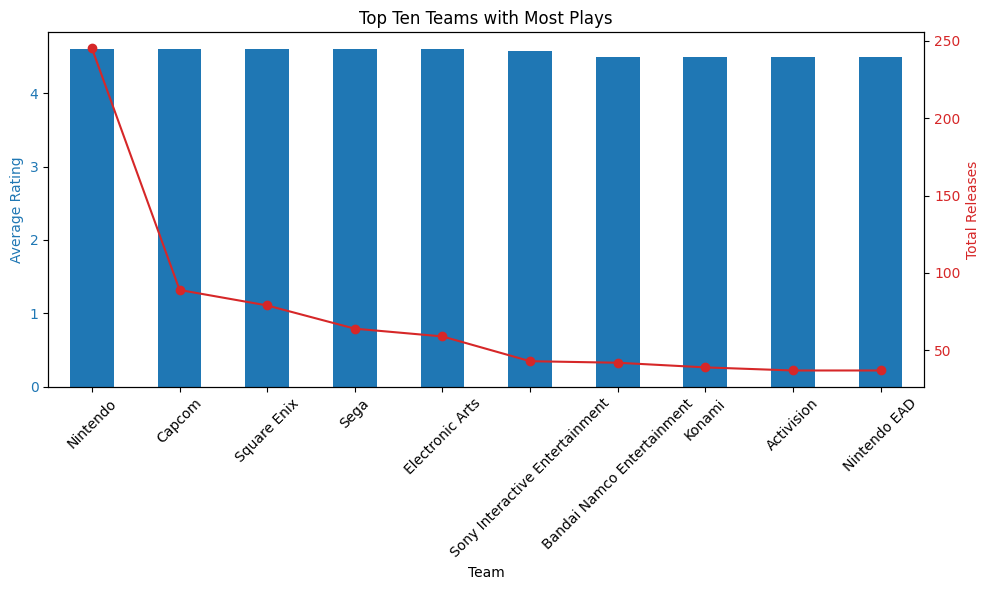

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,Bandai Namco Entertainment,4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3.8K,4.6K,4.8K
0,0,Elden Ring,2022-02-25,FromSoftware,4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,Supergiant Games,4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2.5K,5K,2.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo EPD Production Group No. 3,4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2.5K,5K,2.6K


In [41]:
from ast import literal_eval
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('../Dataset/games.csv')

# Remove rows with 'Release Date' as 'releases on TBD'
df = df[df['Release Date'] != 'releases on TBD']

# Convert 'Release Date' to datetime format
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

# Explode the 'Team' column
df = df.dropna(subset=['Team'])
df['Team'] = df['Team'].apply(literal_eval)
df = df.explode('Team').dropna(subset=['Team'])

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

# Apply the custom function to the 'Value' column
df['Plays'] = df['Plays'].apply(convert_to_int)

# Calculate the total plays per team
total_plays_per_team = df.groupby('Team')['Plays'].count().nlargest(10)

# Calculate the average plays per team
avg_plays_per_team = df.groupby('Team')['Rating'].mean().nlargest(10)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average plays per team
color = 'tab:blue'
ax1.set_xlabel('Team')
ax1.set_ylabel('Average Rating', color=color)
avg_plays_per_team.plot(kind='bar', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for total plays per team
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Releases', color=color)
total_plays_per_team.plot(kind='line', marker='o', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and formatting
plt.title('Top Ten Teams with Most Plays')
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=45 )
plt.tight_layout()
plt.show()

# Save the updated DataFrame to a CSV file
df.to_csv('game_teams_exploded.csv', index=False)

df.head()


### Matplotlib: Average Rating vs Total Plays

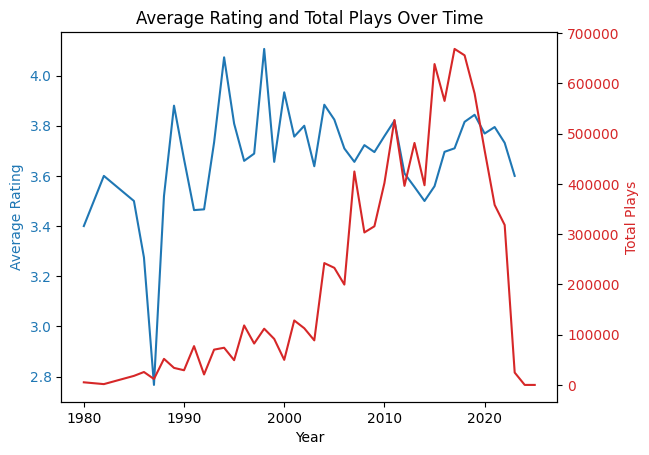

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Year', 'Rating', and 'Plays' columns
# Group by 'Year' and calculate the average rating and total plays

df = pd.read_csv('../Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].dt.year


def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

avg_rating = df.groupby('Year')['Rating'].mean()
total_plays = df.groupby('Year')['Plays'].sum()

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot average rating on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating', color=color)
ax1.plot(avg_rating.index, avg_rating.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for total plays
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Plays', color=color)
ax2.plot(total_plays.index, total_plays.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and show the plot
plt.title('Average Rating and Total Plays Over Time')
plt.show()


### Plotly: Average Rating vs Total Plays

In [43]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv('../Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].dt.year

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

# Filter data up to 2023
df_filtered = df[df['Year'] <= 2023]

# Group by 'Year' and calculate the average rating and total plays
avg_rating = df_filtered.groupby('Year')['Rating'].mean()
total_plays = df_filtered.groupby('Year')['Plays'].sum()

# Create a figure with two y-axes
fig = go.Figure()

# Add scatter plot for average rating on the left y-axis
fig.add_trace(go.Scatter(x=avg_rating.index, y=avg_rating.values, mode='lines', name='Average Rating', line=dict(color='blue')))

# Add scatter plot for total plays on the right y-axis
fig.add_trace(go.Scatter(x=total_plays.index, y=total_plays.values, mode='lines', name='Total Plays', line=dict(color='red'), yaxis='y2'))

# Update layout with x-axis title and range slider
fig.update_layout(
    xaxis_title='Year',
    title='Average Rating and Total Plays Over Time',
    xaxis=dict(
        rangeslider=dict(
            visible=True,
        ),
        type='category'  # Set x-axis type to category for discrete years
    ),
    yaxis=dict(
        title='Average Rating'
    ),
    yaxis2=dict(
        title='Total Plays',
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=1.1,  # Move legend to the right (increase x value for more distance)
        y=1.0,  # Keep legend at the top
        bgcolor='rgba(255, 255, 255, 0.5)',  # Set legend background color with transparency
    )
)

fig.show()

fig.write_html("avg_rating_vs_total_plays.html")



## Complete History of Total Plays Each Year (zoom to show a good visual)
- Plotly has nice scroll features that support this plot well

In [45]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from ast import literal_eval

df = pd.read_csv('../Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].apply(lambda x: x.strftime('%Y'))

df = df.dropna(subset=['Team'])
df['Team'] = df['Team'].apply(literal_eval)

df = df.explode('Team')  # Drop rows with NaN in 'Genres' column


def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

avg_plays_per_team_year = df.groupby(['Team', 'Year'])['Plays'].sum().reset_index()
titles_per_team_year = df.groupby(['Team', 'Year'])['Title'].apply(lambda x: ', '.join(x)).reset_index()

concatenated_df = pd.concat([avg_plays_per_team_year, titles_per_team_year['Title']], axis=1)

concatenated_df.head()

sorted_teams = concatenated_df.groupby('Team')['Plays'].sum().sort_values(ascending=False).index
sorted_years = sorted(concatenated_df['Year'].unique())

fig = px.bar(concatenated_df, x='Team', y='Plays', color='Year',
             title='Teams with the Most Plays by Year',
             labels={'Plays': 'Total Plays', 'Team': 'Team Name', 'Year': 'Year'},
             barmode='stack',
             category_orders={'Year': sorted_years, 'Team': sorted_teams},
             color_discrete_map={year: 'blue' for year in sorted_years},
             hover_data={'Title': True}
            )

fig.update_layout(xaxis_tickangle=-45)

fig.update_layout(autosize=True,
                  width=1000,  # Set the initial width
                  height=600,  # Set the initial height
                  )

fig.show()


fig.write_html("teams_play_history.html")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

